In [1]:
import pandas as pd
import numpy as np
from plotnine import *
schools = pd.read_csv("realSchoolInfo.csv")
pd.set_option('display.max_columns', None)
schools.tail()
schools.fillna(method ='pad')


,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,rankingNoteCharacter,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,rankingSortRank,hs-gpa-avg,urlName,rankingDisplayName,rankingDisplayRank,ranking,xwalkId,rankingIsTied,isPublic,businessRepScore,tuition,engineeringRepScore,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,NaN,False,32,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400,5400,Princeton,princetonuniversity,8544,NaN,7,100,60.0,16793.0,NJ,1,3.9,princeton-university,National Universities,#1,overall,186131,False,True,NaN,47140,4.1,Princeton University,national-universities,NaN,NaN,national-universities,1,private,NaN,ranked,2627
1,NaN,NaN,False,32,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430,6710,Cambridge,harvarduniversity,2138,NaN,5,98,55.0,16338.0,MA,2,4.0,harvard-university,National Universities,#2,overall,166027,False,True,NaN,48949,3.6,Harvard University,national-universities,NaN,NaN,national-universities,2,private,NaN,ranked,2155
2,NaN,NaN,False,32,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450,5941,Chicago,universityofchicago,60637,NaN,8,96,42.0,27767.0,IL,3,4.0,university-of-chicago,National Universities,#3,overall,144050,True,True,NaN,54825,3.6,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,NaN,False,32,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420,5472,New Haven,yaleuniversity,6520,NaN,6,96,50.0,18385.0,CT,3,4.0,yale-university,National Universities,#3,overall,130794,True,True,NaN,51400,3.4,Yale University,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1426
4,NaN,NaN,False,32,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430,6113,New York,columbiauniversity,10027,NaN,6,95,48.0,21041.0,NY,5,4.0,columbia-university,National Universities,#5,overall,190150,True,True,NaN,57208,3.8,Columbia University,national-universities,NaN,UChicago,national-universities,5,private,NaN,ranked,2707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,NaN,NaN,False,18,https://www.usnews.com/img/college-photo_22368...,https://www.usnews.com/img/college-photo_22368...,870,2362,Boiling Springs,gardnerwebbuniversity,28017,NaN,52,27,28.0,37028.0,NC,223,3.7,gardner-webb,National Universities,#223,overall,198561,True,True,2.3,30740,2.7,Gardner-Webb University,national-universities,NaN,Gardner Webb Gardner Webb University,national-universities,223,private,NaN,ranked,2929
226,NaN,NaN,False,20,https://www.usnews.com/img/college-photo_9094.jpg,https://www.usnews.com/img/college-photo_9094_...,950,25455,Atlanta,georgiastateuniversity,30302,NaN,53,27,28.0,37028.0,GA,223,3.4,georgia-state,National Universities,#223,overall,139940,True,True,3.1,29432,2.7,Georgia State University,national-universities,NaN,Gardner Webb Gardner Webb University,national-universities,223,public,NaN,ranked,1574
227,NaN,NaN,False,19,https://www.usnews.com/img/college-photo_6073.jpg,https://www.usnews.com/img/college-photo_6073_...,880,2099,Winchester,shenandoahuniversity,22601,NaN,88,27,28.0,37028.0,VA,223,3.4,shenandoah-university,National Universities,#223,overall,233541,True,True,2.0,31920,2.7,Shenandoah University,national-universities,NaN,Gardner Webb Gardner Webb University,national-universities,223,private,NaN,ranked,3737
228,NaN,NaN,False,19,https://www.usnews.com/img/college-photo_6073.jpg,https://www.usnews.com/img/college-photo_6073_...,830,7500,Vermillion,universityofsouthdakot

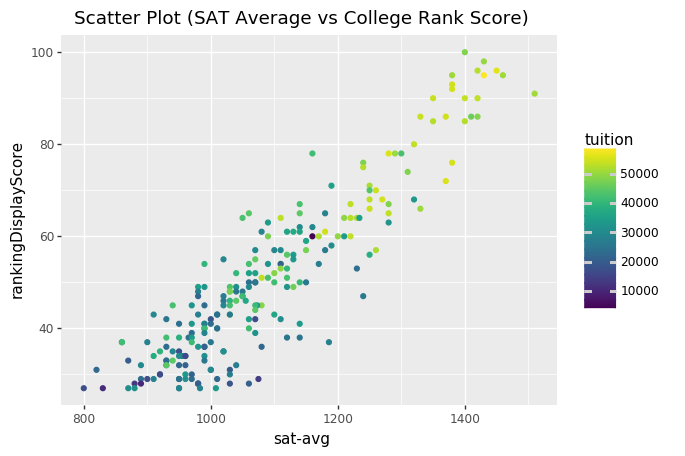

<ggplot: (-2118287753)>

In [2]:
# Exploratory Data Analysis
from sklearn.linear_model import LinearRegression # get linear regression function
ggplot(schools,aes(x="sat-avg",y="rankingDisplayScore",color="tuition"))+geom_point() + labs(title = "Scatter Plot (SAT Average vs College Rank Score)")
# SAT average vs college rank scatterplot

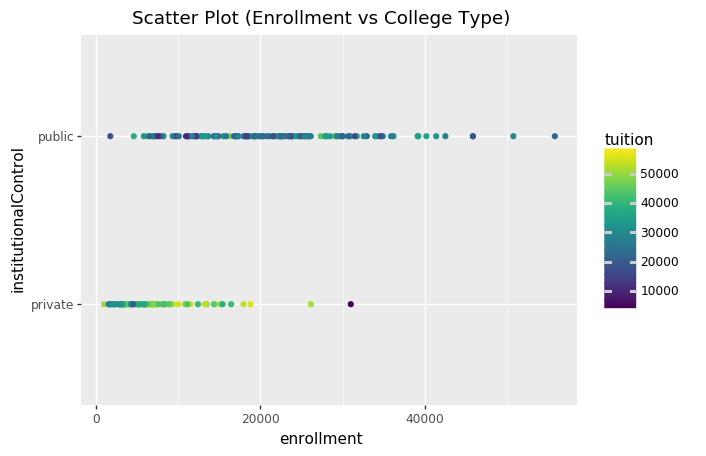

<ggplot: (-2117155131)>

In [3]:
# Enrollment vs college type scatterplot
ggplot(schools,aes(x="enrollment",y="institutionalControl",color="tuition"))+geom_point() + labs(title = "Scatter Plot (Enrollment vs College Type)")

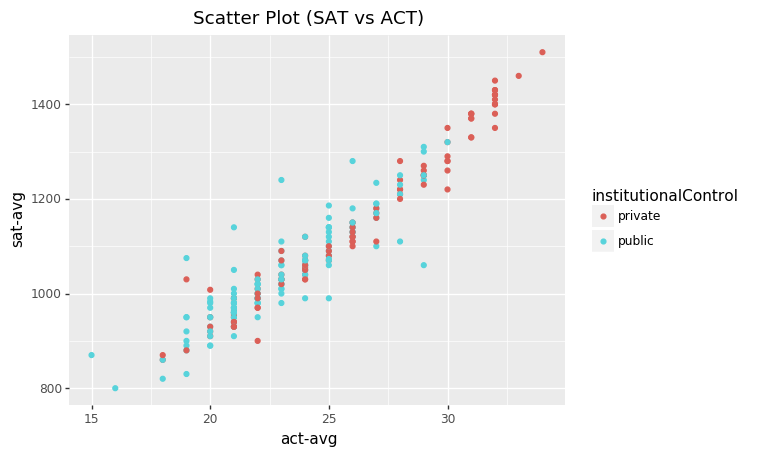

<ggplot: (-2117074533)>

In [4]:
#average SAT vs ACT scatterplot
ggplot(schools,aes(x="act-avg",y="sat-avg", color="institutionalControl"))+geom_point()+labs(title = "Scatter Plot (SAT vs ACT)")

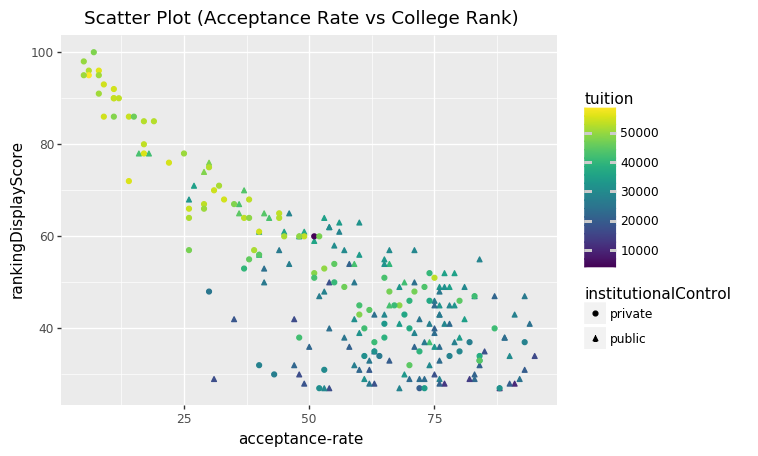

<ggplot: (30419812)>

In [5]:
# Acceptance rate vs college rank graph, shaped by college type
ggplot(schools,aes(x="acceptance-rate",y="rankingDisplayScore", color="tuition", shape = "institutionalControl"))+geom_point()+labs(title="Scatter Plot (Acceptance Rate vs College Rank)")


In [49]:
schools.fillna(method ='pad') # deal with few remaining null values
# schools1.drop(schools1.index[[230,310]])


x = schools['sat-avg'].values.reshape(-1,1)

y = schools['rankingDisplayScore'].values.reshape(-1,1)

# schools1.dropna(subset = schools1['rankingDisplayScore'], inplace = True, how = 'any')
lm = LinearRegression() #prepare linear regression model
# np.where(schools1.values >= np.finfo(np.float64).max)



lm.fit(x,y)
print("The equation of the line is:")
print("y = ",lm.intercept_[0],"+",lm.coef_[0][0],"x") 

The equation of the line is:
y =  -70.70241490478662 + 0.11128992559561734 x


In [50]:
predicted_y = lm.predict(x)
from sklearn.metrics import r2_score
print("The equation of the line is:")
print("y = ",lm.intercept_[0],"+",lm.coef_[0][0],"x")
# print the r-squared
print("R-squared: ",r2_score(y,predicted_y))

The equation of the line is:
y =  -70.70241490478662 + 0.11128992559561734 x
R-squared:  0.829716911273534


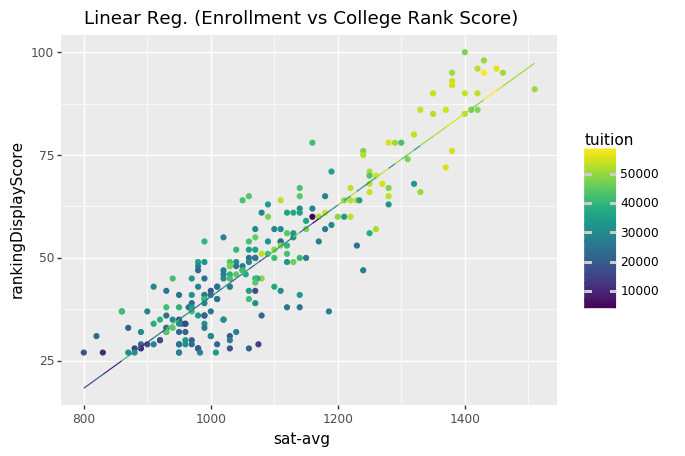

<ggplot: (32728953)>

In [53]:
ggplot(schools,aes(x="sat-avg",y="rankingDisplayScore",color="tuition"))+geom_point()+geom_line(aes(y='predicted_y')) + labs(title = "Linear Reg. (Enrollment vs College Rank Score)")

In [13]:
from sklearn.preprocessing import LabelEncoder
# use onehotencoding for converting college type to numeric values
enc = LabelEncoder()
# 0 = private, 1 = public
schools['institutionalControl'] = enc.fit_transform(schools['institutionalControl'])

In [14]:
# logistic regression 
logx = schools[['enrollment']]
logy = schools[['institutionalControl']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logx, logy, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(184, 1) (184, 1)
(46, 1) (46, 1)


In [15]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predictions = logmodel.predict(X_test)
# print(predictions) 
print("Accuracy score: ", accuracy_score(y_test, predictions))
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

Accuracy score:  0.8260869565217391
[[19  3]
 [ 5 19]]


c:\users\milla\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


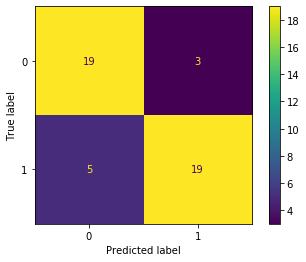

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,X_test,y_test)

In [17]:
x = schools['enrollment'].values.reshape(-1,1)

y = schools['institutionalControl'].values.reshape(-1,1)

lm = LinearRegression()

lm.fit(x,y)
print("The equation of the line is:")
print("y = ",lm.intercept_[0],"+",lm.coef_[0][0],"x")
predicted_y = lm.predict(x)
from sklearn.metrics import r2_score
print("Accuracy score: ", r2_score(y,predicted_y))
# proves logistic > linear for predicting if a 

The equation of the line is:
y =  0.11953005389002663 + 2.9673013816700234e-05 x
Accuracy score:  0.4363591196502359


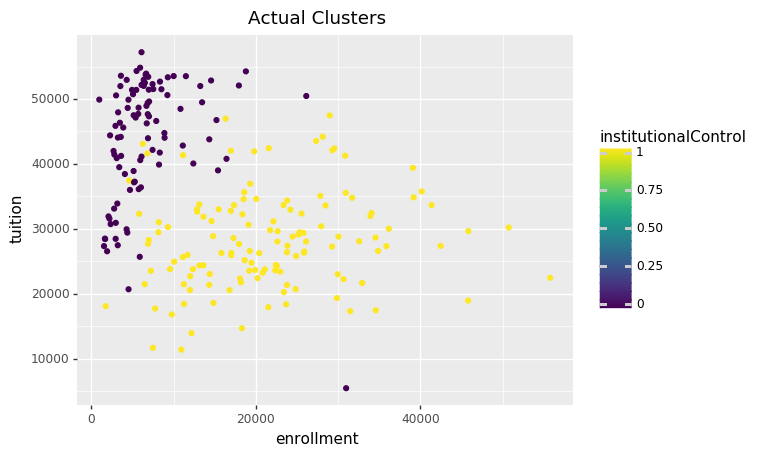

<ggplot: (31087869)>

In [18]:
ggplot(schools,aes(x="enrollment",y="tuition", color="institutionalControl"))+geom_point()+labs(title="Actual Clusters")

In [19]:
typeX = schools[['enrollment', 'tuition']]
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, random_state=20)
km.fit(typeX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [20]:
centers = km.cluster_centers_
labels = km.labels_
schools['new_types'] = labels

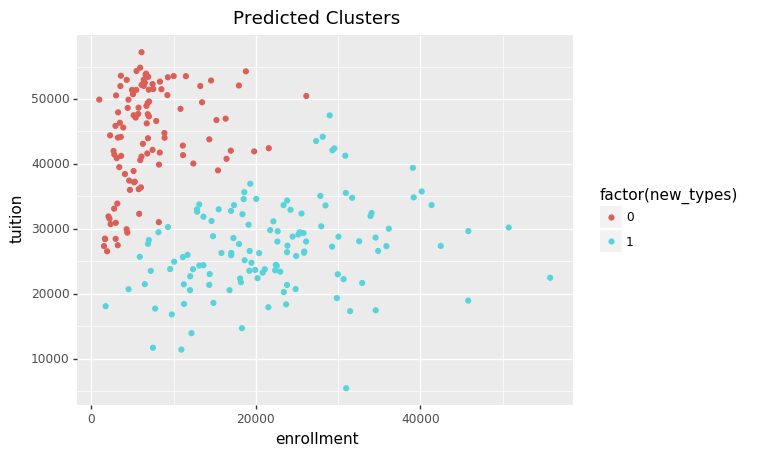

<ggplot: (-2116215129)>

In [21]:
ggplot(schools,aes(x="enrollment",y="tuition", color="factor(new_types)"))+geom_point()+labs(title="Predicted Clusters")

In [22]:

sse = {}

for k in range(1,20):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(typeX)
    sse[k] = km.inertia_
df = pd.DataFrame({"k":list(sse.keys()),"sse":list(sse.values())})


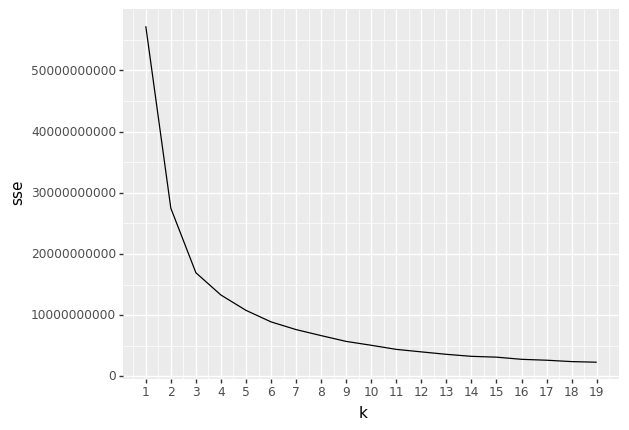

<ggplot: (30900505)>

In [23]:
ggplot(df,aes(x="k",y="sse"))+geom_line()+scale_x_continuous(breaks = list(sse.keys()))


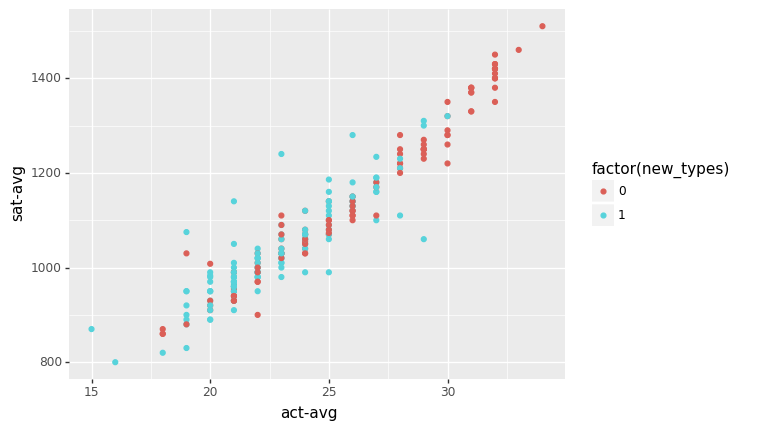

<ggplot: (32721309)>

In [24]:
ggplot(schools,aes(x="act-avg",y="sat-avg", color="factor(new_types)"))+geom_point()

In [25]:
everything = schools[['act-avg', 'sat-avg', 'enrollment','acceptance-rate','rankingDisplayScore','tuition']]
from sklearn.preprocessing import StandardScaler
everything = StandardScaler().fit_transform(everything)

from sklearn.preprocessing import Normalizer
everything = Normalizer().fit_transform(everything)

In [26]:
from sklearn.decomposition import PCA # reduce 6 components into 2

pca = PCA(n_components=2) # 2 dimensions
principalComponents = pca.fit_transform(everything)

In [27]:
schools['PC1'] = principalComponents[:,0]
schools['PC2'] = principalComponents[:,1]

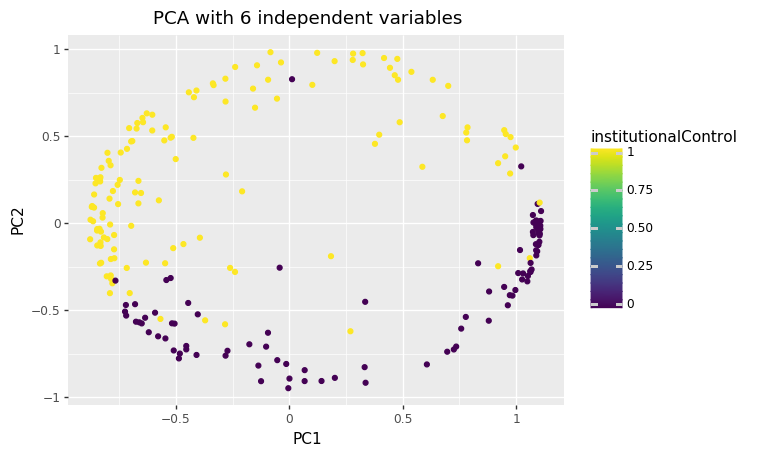

<ggplot: (-2116215132)>

In [28]:
ggplot(schools,aes(x="PC1",y="PC2",color="institutionalControl"))+geom_point()+labs(title="PCA with 6 independent variables")


In [29]:
pca.explained_variance_ratio_


array([0.54491826, 0.26845067])

In [30]:
logx = schools[['PC1', 'PC2']]
logy = schools[['institutionalControl']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logx, logy, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predictions = logmodel.predict(X_test)

print(accuracy_score(y_test, predictions))

(184, 2) (184, 1)
(46, 2) (46, 1)
0.9565217391304348


c:\users\milla\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


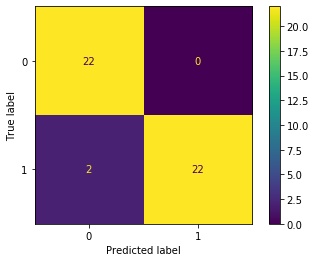

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,X_test,y_test)


In [32]:
everything = schools[['act-avg', 'sat-avg', 'enrollment','acceptance-rate','rankingDisplayScore','tuition']]
from sklearn.preprocessing import StandardScaler
everything = StandardScaler().fit_transform(everything)

from sklearn.decomposition import PCA # reduce 6 components into 2

pca = PCA(n_components=2) # 2 dimensions
principalComponents = pca.fit_transform(everything)

from sklearn.preprocessing import Normalizer
everything = Normalizer().fit_transform(everything)
logx = schools[['PC1', 'PC2']]
logy = schools[['institutionalControl']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logx, logy, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predictions = logmodel.predict(X_test)

print(accuracy_score(y_test, predictions))

(184, 2) (184, 1)
(46, 2) (46, 1)
0.9565217391304348


c:\users\milla\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
x = schools[['act-avg', 'sat-avg', 'enrollment','acceptance-rate','rankingDisplayScore','tuition']]
y = schools['institutionalControl']
from sklearn.neighbors import KNeighborsClassifier

neigh=KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # split data into training and testing sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
neigh.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
predictions = neigh.predict(X_test)
accuracy_score(y_test,predictions)

(184, 6) (184,)
(46, 6) (46,)


0.9130434782608695

In [34]:
x = schools[['act-avg', 'sat-avg', 'enrollment','acceptance-rate','rankingDisplayScore','tuition']]
y = schools['institutionalControl']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

X_train.shape
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [35]:
pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.8840579710144928